In [1]:
"""
Intructions to run this notebook:
1. Source the environment using . env.sh and cd to percept/eval directory. 
2. Run the notebook server using `jupyter notebook` command in terminal.
3. Connect to the notebook server using the provided URL.
"""
%load_ext autoreload
%autoreload 2


import psutil
import time

from process_results import MetricsReader
import yaml
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np
from pathlib import Path
import traceback

pio.templates.default = "plotly_white"
pio.renderers.default = "browser"

In [2]:
plan = 'compute_perf_r1'
results_dir = Path('results') / plan
plan_dir = Path('plans') / 'compute_perf_r1'
cache_filepath = plan_dir / "results.msgpack"

LOAD_CACHE = False # Flip this to True when only doing analysis
SUCCESS_TIME_LIMIT = 120.0
ACCEPTABLE_MIN_DISTANCES_TO_TARGET = 0.10

In [3]:
from mp_eval.classes.scene_generator import SceneGenerator

import msgpack
import msgpack_numpy as mnp

results = {}
failed_cases = {}

if LOAD_CACHE:
  def load_large_msgpack(filename):
    with open(filename, "rb") as f:
      unpacker = msgpack.Unpacker(f, raw=False, object_hook=mnp.decode)
      for key, value in unpacker:
        results[key] = value  # Load one entry at a time
  load_large_msgpack(cache_filepath)
else:
  filepaths = sorted(list(results_dir.glob('*.result')))
  results_str = {}
  for filepath in filepaths:
    try:
      reader = MetricsReader(
        filepath, 
        success_time_limit=SUCCESS_TIME_LIMIT, 
        acceptable_min_distances_to_target=ACCEPTABLE_MIN_DISTANCES_TO_TARGET
      )
      reader.pointclouds = None
      results[reader.info['label']] = reader
      results_str[reader.info['label']] = reader.format_stats()
    except Exception as e:
      print(f"Error reading {filepath}: {e}!")
      failed_cases[filepath] = {'e': str(e), 'traceback': traceback.format_exc()}

  def save_large_msgpack(data, filename):
    with open(filename, "wb") as f:
      packer = msgpack.Packer(default=mnp.encode)
      for _, result in data.items():
        key = result.info['label']
        val = result.info
        f.write(packer.pack((key, val)))
  # save_large_msgpack(results, cache_filepath)

for k, v in failed_cases.items():
  print(k)
  print(v['e'])
  # print(v['traceback'])
  print("-"*100)

Processing records: 100%|███████████████████████████████████████████████████████| 4054/4054 [00:00<00:00, 406495.54it/s]


File: 250610-01-24-44~scene_1-cpu_0-predsteps_0-pose_0.result took 0.577 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4049/4049 [00:00<00:00, 487253.60it/s]


File: 250610-01-26-55~scene_1-cpu_0-predsteps_0-pose_1.result took 0.534 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4042/4042 [00:00<00:00, 429210.28it/s]


File: 250610-01-29-06~scene_1-cpu_0-predsteps_0-pose_2.result took 0.491 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4067/4067 [00:00<00:00, 461832.21it/s]


File: 250610-01-31-16~scene_1-cpu_0-predsteps_0-pose_3.result took 0.489 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4067/4067 [00:00<00:00, 424661.66it/s]


File: 250610-01-33-27~scene_1-cpu_0-predsteps_0-pose_4.result took 0.480 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4054/4054 [00:00<00:00, 471082.10it/s]


File: 250610-01-35-38~scene_1-cpu_0-predsteps_0-pose_5.result took 0.492 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4048/4048 [00:00<00:00, 503067.93it/s]


File: 250610-01-37-48~scene_1-cpu_0-predsteps_0-pose_6.result took 0.478 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4052/4052 [00:00<00:00, 523480.56it/s]


File: 250610-01-39-59~scene_1-cpu_0-predsteps_0-pose_7.result took 0.486 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4057/4057 [00:00<00:00, 485264.68it/s]


File: 250610-01-42-10~scene_1-cpu_0-predsteps_0-pose_8.result took 0.496 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4054/4054 [00:00<00:00, 488135.40it/s]


File: 250610-01-44-20~scene_1-cpu_0-predsteps_0-pose_9.result took 0.494 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2242/2242 [00:00<00:00, 527168.38it/s]


File: 250610-01-46-31~scene_1-cpu_0-predsteps_1-pose_0.result took 0.467 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2239/2239 [00:00<00:00, 560626.03it/s]


File: 250610-01-48-42~scene_1-cpu_0-predsteps_1-pose_1.result took 0.505 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2249/2249 [00:00<00:00, 426735.57it/s]


File: 250610-01-50-52~scene_1-cpu_0-predsteps_1-pose_2.result took 0.470 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2242/2242 [00:00<00:00, 544475.11it/s]


File: 250610-01-53-03~scene_1-cpu_0-predsteps_1-pose_3.result took 0.456 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2237/2237 [00:00<00:00, 458227.10it/s]


File: 250610-01-55-13~scene_1-cpu_0-predsteps_1-pose_4.result took 0.455 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2247/2247 [00:00<00:00, 530485.26it/s]


File: 250610-01-57-24~scene_1-cpu_0-predsteps_1-pose_5.result took 0.463 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2249/2249 [00:00<00:00, 450563.13it/s]


File: 250610-01-59-35~scene_1-cpu_0-predsteps_1-pose_6.result took 0.456 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2242/2242 [00:00<00:00, 528620.47it/s]


File: 250610-02-01-45~scene_1-cpu_0-predsteps_1-pose_7.result took 0.469 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2242/2242 [00:00<00:00, 493214.60it/s]


File: 250610-02-03-56~scene_1-cpu_0-predsteps_1-pose_8.result took 0.466 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2237/2237 [00:00<00:00, 385641.51it/s]


File: 250610-02-06-07~scene_1-cpu_0-predsteps_1-pose_9.result took 0.475 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1342/1342 [00:00<00:00, 422040.64it/s]


File: 250610-02-08-17~scene_1-cpu_0-predsteps_2-pose_0.result took 0.448 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1339/1339 [00:00<00:00, 505870.39it/s]


File: 250610-02-10-28~scene_1-cpu_0-predsteps_2-pose_1.result took 0.448 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 521024.29it/s]


File: 250610-02-12-39~scene_1-cpu_0-predsteps_2-pose_2.result took 0.439 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 365542.30it/s]


File: 250610-02-14-49~scene_1-cpu_0-predsteps_2-pose_3.result took 0.441 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 453264.18it/s]


File: 250610-02-17-00~scene_1-cpu_0-predsteps_2-pose_4.result took 0.458 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 507170.52it/s]


File: 250610-02-19-11~scene_1-cpu_0-predsteps_2-pose_5.result took 0.439 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1344/1344 [00:00<00:00, 357414.70it/s]


File: 250610-02-21-21~scene_1-cpu_0-predsteps_2-pose_6.result took 0.445 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 394719.82it/s]


File: 250610-02-23-32~scene_1-cpu_0-predsteps_2-pose_7.result took 0.449 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 545663.56it/s]


File: 250610-02-25-43~scene_1-cpu_0-predsteps_2-pose_8.result took 0.437 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1337/1337 [00:00<00:00, 577526.72it/s]


File: 250610-02-27-53~scene_1-cpu_0-predsteps_2-pose_9.result took 0.441 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1154/1154 [00:00<00:00, 336056.85it/s]


File: 250610-02-30-04~scene_1-cpu_1-predsteps_0-pose_0.result took 0.457 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1152/1152 [00:00<00:00, 464689.19it/s]


File: 250610-02-32-14~scene_1-cpu_1-predsteps_0-pose_1.result took 0.465 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1114/1114 [00:00<00:00, 571414.29it/s]


File: 250610-02-34-25~scene_1-cpu_1-predsteps_0-pose_2.result took 0.452 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1122/1122 [00:00<00:00, 556265.85it/s]


File: 250610-02-36-36~scene_1-cpu_1-predsteps_0-pose_3.result took 0.440 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1157/1157 [00:00<00:00, 547968.58it/s]


File: 250610-02-38-46~scene_1-cpu_1-predsteps_0-pose_4.result took 0.454 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1157/1157 [00:00<00:00, 526506.43it/s]


File: 250610-02-40-57~scene_1-cpu_1-predsteps_0-pose_5.result took 0.442 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1172/1172 [00:00<00:00, 499717.83it/s]


File: 250610-02-43-08~scene_1-cpu_1-predsteps_0-pose_6.result took 0.440 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1147/1147 [00:00<00:00, 541215.74it/s]


File: 250610-02-45-18~scene_1-cpu_1-predsteps_0-pose_7.result took 0.441 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1134/1134 [00:00<00:00, 464123.80it/s]


File: 250610-02-47-29~scene_1-cpu_1-predsteps_0-pose_8.result took 0.440 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1122/1122 [00:00<00:00, 536970.46it/s]


File: 250610-02-49-40~scene_1-cpu_1-predsteps_0-pose_9.result took 0.442 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 792/792 [00:00<00:00, 280280.86it/s]


File: 250610-02-51-50~scene_1-cpu_1-predsteps_1-pose_0.result took 0.443 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 797/797 [00:00<00:00, 401111.15it/s]


File: 250610-02-54-01~scene_1-cpu_1-predsteps_1-pose_1.result took 0.433 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 767/767 [00:00<00:00, 309955.79it/s]


File: 250610-02-56-12~scene_1-cpu_1-predsteps_1-pose_2.result took 0.466 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 762/762 [00:00<00:00, 452699.67it/s]


File: 250610-02-58-22~scene_1-cpu_1-predsteps_1-pose_3.result took 0.438 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 799/799 [00:00<00:00, 332861.43it/s]


File: 250610-03-00-33~scene_1-cpu_1-predsteps_1-pose_4.result took 0.437 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 792/792 [00:00<00:00, 535356.77it/s]


File: 250610-03-02-43~scene_1-cpu_1-predsteps_1-pose_5.result took 0.505 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 804/804 [00:00<00:00, 361399.68it/s]


File: 250610-03-04-54~scene_1-cpu_1-predsteps_1-pose_6.result took 0.442 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 789/789 [00:00<00:00, 538711.68it/s]


File: 250610-03-07-05~scene_1-cpu_1-predsteps_1-pose_7.result took 0.439 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 794/794 [00:00<00:00, 555601.83it/s]


File: 250610-03-09-15~scene_1-cpu_1-predsteps_1-pose_8.result took 0.443 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 784/784 [00:00<00:00, 528926.22it/s]


File: 250610-03-11-26~scene_1-cpu_1-predsteps_1-pose_9.result took 0.443 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 619/619 [00:00<00:00, 242733.19it/s]


File: 250610-03-13-37~scene_1-cpu_1-predsteps_2-pose_0.result took 0.445 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 585229.66it/s]


File: 250610-03-15-47~scene_1-cpu_1-predsteps_2-pose_1.result took 0.500 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 609/609 [00:00<00:00, 532152.32it/s]


File: 250610-03-17-58~scene_1-cpu_1-predsteps_2-pose_2.result took 0.518 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 614/614 [00:00<00:00, 477526.92it/s]


File: 250610-03-20-09~scene_1-cpu_1-predsteps_2-pose_3.result took 0.592 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 612/612 [00:00<00:00, 432869.15it/s]


File: 250610-03-22-19~scene_1-cpu_1-predsteps_2-pose_4.result took 0.602 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 612/612 [00:00<00:00, 482774.88it/s]


File: 250610-03-24-30~scene_1-cpu_1-predsteps_2-pose_5.result took 0.607 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 438699.03it/s]


File: 250610-03-26-40~scene_1-cpu_1-predsteps_2-pose_6.result took 0.750 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 510834.10it/s]


File: 250610-03-28-51~scene_1-cpu_1-predsteps_2-pose_7.result took 0.764 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 609/609 [00:00<00:00, 273102.87it/s]


File: 250610-03-31-02~scene_1-cpu_1-predsteps_2-pose_8.result took 0.760 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 619/619 [00:00<00:00, 578363.59it/s]


File: 250610-03-33-12~scene_1-cpu_1-predsteps_2-pose_9.result took 1.020 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4205/4205 [00:00<00:00, 495144.53it/s]


File: 250610-03-35-23~scene_2-cpu_0-predsteps_0-pose_0.result took 0.269 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4220/4220 [00:00<00:00, 516651.47it/s]


File: 250610-03-37-34~scene_2-cpu_0-predsteps_0-pose_1.result took 0.199 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4205/4205 [00:00<00:00, 464768.85it/s]


File: 250610-03-39-44~scene_2-cpu_0-predsteps_0-pose_2.result took 0.214 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4210/4210 [00:00<00:00, 441340.16it/s]


File: 250610-03-41-55~scene_2-cpu_0-predsteps_0-pose_3.result took 0.208 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4200/4200 [00:00<00:00, 394802.26it/s]


File: 250610-03-44-06~scene_2-cpu_0-predsteps_0-pose_4.result took 0.232 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4215/4215 [00:00<00:00, 536019.39it/s]


File: 250610-03-46-16~scene_2-cpu_0-predsteps_0-pose_5.result took 0.213 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4205/4205 [00:00<00:00, 549920.44it/s]


File: 250610-03-48-27~scene_2-cpu_0-predsteps_0-pose_6.result took 0.217 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4205/4205 [00:00<00:00, 507847.86it/s]


File: 250610-03-50-38~scene_2-cpu_0-predsteps_0-pose_7.result took 0.205 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4215/4215 [00:00<00:00, 482347.25it/s]


File: 250610-03-52-48~scene_2-cpu_0-predsteps_0-pose_8.result took 0.216 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 4220/4220 [00:00<00:00, 499970.70it/s]


File: 250610-03-54-59~scene_2-cpu_0-predsteps_0-pose_9.result took 0.205 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2330/2330 [00:00<00:00, 366143.21it/s]


File: 250610-03-57-10~scene_2-cpu_0-predsteps_1-pose_0.result took 0.177 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2330/2330 [00:00<00:00, 550142.33it/s]


File: 250610-03-59-20~scene_2-cpu_0-predsteps_1-pose_1.result took 0.199 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2330/2330 [00:00<00:00, 460001.33it/s]


File: 250610-04-01-31~scene_2-cpu_0-predsteps_1-pose_2.result took 0.160 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2330/2330 [00:00<00:00, 545840.50it/s]


File: 250610-04-03-41~scene_2-cpu_0-predsteps_1-pose_3.result took 0.181 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2325/2325 [00:00<00:00, 445204.38it/s]


File: 250610-04-05-52~scene_2-cpu_0-predsteps_1-pose_4.result took 0.381 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2330/2330 [00:00<00:00, 441425.91it/s]


File: 250610-04-08-03~scene_2-cpu_0-predsteps_1-pose_5.result took 0.393 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2325/2325 [00:00<00:00, 518958.91it/s]


File: 250610-04-10-13~scene_2-cpu_0-predsteps_1-pose_6.result took 0.221 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2335/2335 [00:00<00:00, 396602.41it/s]


File: 250610-04-12-24~scene_2-cpu_0-predsteps_1-pose_7.result took 0.189 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2335/2335 [00:00<00:00, 543792.33it/s]


File: 250610-04-14-35~scene_2-cpu_0-predsteps_1-pose_8.result took 0.199 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2335/2335 [00:00<00:00, 386506.96it/s]


File: 250610-04-16-45~scene_2-cpu_0-predsteps_1-pose_9.result took 0.154 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 566742.74it/s]


File: 250610-04-18-56~scene_2-cpu_0-predsteps_2-pose_0.result took 0.183 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1395/1395 [00:00<00:00, 373487.43it/s]


File: 250610-04-21-07~scene_2-cpu_0-predsteps_2-pose_1.result took 0.139 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 423605.50it/s]


File: 250610-04-23-17~scene_2-cpu_0-predsteps_2-pose_2.result took 0.731 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1395/1395 [00:00<00:00, 569667.42it/s]


File: 250610-04-25-28~scene_2-cpu_0-predsteps_2-pose_3.result took 0.171 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 534526.69it/s]


File: 250610-04-27-38~scene_2-cpu_0-predsteps_2-pose_4.result took 0.705 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 321198.97it/s]


File: 250610-04-29-49~scene_2-cpu_0-predsteps_2-pose_5.result took 0.786 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1395/1395 [00:00<00:00, 589170.69it/s]


File: 250610-04-32-00~scene_2-cpu_0-predsteps_2-pose_6.result took 0.581 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 574562.19it/s]


File: 250610-04-34-10~scene_2-cpu_0-predsteps_2-pose_7.result took 0.564 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 344893.67it/s]


File: 250610-04-36-21~scene_2-cpu_0-predsteps_2-pose_8.result took 0.176 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 489429.36it/s]


File: 250610-04-38-32~scene_2-cpu_0-predsteps_2-pose_9.result took 0.168 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2740/2740 [00:00<00:00, 581510.55it/s]


File: 250610-04-40-42~scene_2-cpu_1-predsteps_0-pose_0.result took 0.405 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2850/2850 [00:00<00:00, 512245.73it/s]


File: 250610-04-42-53~scene_2-cpu_1-predsteps_0-pose_1.result took 1.054 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2745/2745 [00:00<00:00, 443504.02it/s]


File: 250610-04-45-04~scene_2-cpu_1-predsteps_0-pose_2.result took 0.775 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2765/2765 [00:00<00:00, 434777.33it/s]


File: 250610-04-47-14~scene_2-cpu_1-predsteps_0-pose_3.result took 0.279 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2755/2755 [00:00<00:00, 494937.57it/s]


File: 250610-04-49-25~scene_2-cpu_1-predsteps_0-pose_4.result took 0.509 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2755/2755 [00:00<00:00, 364061.36it/s]


File: 250610-04-51-35~scene_2-cpu_1-predsteps_0-pose_5.result took 0.169 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2740/2740 [00:00<00:00, 490750.40it/s]


File: 250610-04-53-46~scene_2-cpu_1-predsteps_0-pose_6.result took 0.167 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2820/2820 [00:00<00:00, 531330.01it/s]


File: 250610-04-55-57~scene_2-cpu_1-predsteps_0-pose_7.result took 0.168 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2770/2770 [00:00<00:00, 466595.26it/s]


File: 250610-04-58-07~scene_2-cpu_1-predsteps_0-pose_8.result took 0.184 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2815/2815 [00:00<00:00, 439427.06it/s]


File: 250610-05-00-18~scene_2-cpu_1-predsteps_0-pose_9.result took 0.176 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1590/1590 [00:00<00:00, 568343.56it/s]


File: 250610-05-02-29~scene_2-cpu_1-predsteps_1-pose_0.result took 0.180 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1635/1635 [00:00<00:00, 503279.54it/s]


File: 250610-05-04-39~scene_2-cpu_1-predsteps_1-pose_1.result took 0.151 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1600/1600 [00:00<00:00, 441128.40it/s]


File: 250610-05-06-50~scene_2-cpu_1-predsteps_1-pose_2.result took 0.152 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1610/1610 [00:00<00:00, 478279.58it/s]


File: 250610-05-09-01~scene_2-cpu_1-predsteps_1-pose_3.result took 0.171 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1605/1605 [00:00<00:00, 342448.77it/s]


File: 250610-05-11-11~scene_2-cpu_1-predsteps_1-pose_4.result took 0.150 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1605/1605 [00:00<00:00, 404242.95it/s]


File: 250610-05-13-22~scene_2-cpu_1-predsteps_1-pose_5.result took 0.149 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1575/1575 [00:00<00:00, 403150.79it/s]


File: 250610-05-15-32~scene_2-cpu_1-predsteps_1-pose_6.result took 0.147 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1630/1630 [00:00<00:00, 549531.03it/s]


File: 250610-05-17-43~scene_2-cpu_1-predsteps_1-pose_7.result took 0.150 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1610/1610 [00:00<00:00, 485605.45it/s]


File: 250610-05-19-54~scene_2-cpu_1-predsteps_1-pose_8.result took 0.167 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1625/1625 [00:00<00:00, 578782.61it/s]


File: 250610-05-22-04~scene_2-cpu_1-predsteps_1-pose_9.result took 0.134 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1015/1015 [00:00<00:00, 419637.12it/s]


File: 250610-05-24-15~scene_2-cpu_1-predsteps_2-pose_0.result took 0.147 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 406720.39it/s]


File: 250610-05-26-26~scene_2-cpu_1-predsteps_2-pose_1.result took 0.157 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1025/1025 [00:00<00:00, 254177.70it/s]


File: 250610-05-28-36~scene_2-cpu_1-predsteps_2-pose_2.result took 0.140 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1020/1020 [00:00<00:00, 519955.04it/s]


File: 250610-05-30-47~scene_2-cpu_1-predsteps_2-pose_3.result took 0.143 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1020/1020 [00:00<00:00, 538475.78it/s]


File: 250610-05-32-58~scene_2-cpu_1-predsteps_2-pose_4.result took 0.153 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1015/1015 [00:00<00:00, 529636.55it/s]


File: 250610-05-35-08~scene_2-cpu_1-predsteps_2-pose_5.result took 0.135 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 561327.52it/s]


File: 250610-05-37-19~scene_2-cpu_1-predsteps_2-pose_6.result took 0.149 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1045/1045 [00:00<00:00, 408637.67it/s]


File: 250610-05-39-30~scene_2-cpu_1-predsteps_2-pose_7.result took 0.149 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1020/1020 [00:00<00:00, 526028.54it/s]


File: 250610-05-41-40~scene_2-cpu_1-predsteps_2-pose_8.result took 0.649 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 350705.59it/s]


File: 250610-05-43-51~scene_2-cpu_1-predsteps_2-pose_9.result took 0.843 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3744/3744 [00:00<00:00, 429326.47it/s]


File: 250610-05-46-01~scene_3-cpu_0-predsteps_0-pose_0.result took 9.318 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3690/3690 [00:00<00:00, 420227.58it/s]


File: 250610-05-48-12~scene_3-cpu_0-predsteps_0-pose_1.result took 2.553 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3780/3780 [00:00<00:00, 522284.53it/s]


File: 250610-05-50-23~scene_3-cpu_0-predsteps_0-pose_2.result took 0.600 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3828/3828 [00:00<00:00, 488656.78it/s]


File: 250610-05-52-33~scene_3-cpu_0-predsteps_0-pose_3.result took 0.593 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3732/3732 [00:00<00:00, 456999.37it/s]


File: 250610-05-54-44~scene_3-cpu_0-predsteps_0-pose_4.result took 0.583 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3804/3804 [00:00<00:00, 498364.28it/s]


File: 250610-05-56-55~scene_3-cpu_0-predsteps_0-pose_5.result took 0.592 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3732/3732 [00:00<00:00, 528804.52it/s]


File: 250610-05-59-05~scene_3-cpu_0-predsteps_0-pose_6.result took 0.568 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3729/3729 [00:00<00:00, 461305.40it/s]


File: 250610-06-01-16~scene_3-cpu_0-predsteps_0-pose_7.result took 0.592 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3780/3780 [00:00<00:00, 447588.20it/s]


File: 250610-06-03-27~scene_3-cpu_0-predsteps_0-pose_8.result took 0.634 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3750/3750 [00:00<00:00, 477522.62it/s]


File: 250610-06-05-37~scene_3-cpu_0-predsteps_0-pose_9.result took 0.559 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2115/2115 [00:00<00:00, 501297.07it/s]


File: 250610-06-07-48~scene_3-cpu_0-predsteps_1-pose_0.result took 1.464 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2109/2109 [00:00<00:00, 546947.82it/s]


File: 250610-06-09-58~scene_3-cpu_0-predsteps_1-pose_1.result took 2.506 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2124/2124 [00:00<00:00, 477550.35it/s]


File: 250610-06-12-09~scene_3-cpu_0-predsteps_1-pose_2.result took 3.751 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2082/2082 [00:00<00:00, 495070.07it/s]


File: 250610-06-14-20~scene_3-cpu_0-predsteps_1-pose_3.result took 2.238 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2094/2094 [00:00<00:00, 407387.75it/s]


File: 250610-06-16-30~scene_3-cpu_0-predsteps_1-pose_4.result took 0.530 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2109/2109 [00:00<00:00, 476630.59it/s]


File: 250610-06-18-41~scene_3-cpu_0-predsteps_1-pose_5.result took 0.596 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2082/2082 [00:00<00:00, 261429.84it/s]


File: 250610-06-20-52~scene_3-cpu_0-predsteps_1-pose_6.result took 0.580 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2073/2073 [00:00<00:00, 501719.11it/s]


File: 250610-06-23-02~scene_3-cpu_0-predsteps_1-pose_7.result took 3.773 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2076/2076 [00:00<00:00, 397216.14it/s]


File: 250610-06-25-13~scene_3-cpu_0-predsteps_1-pose_8.result took 4.340 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2103/2103 [00:00<00:00, 367556.52it/s]


File: 250610-06-27-24~scene_3-cpu_0-predsteps_1-pose_9.result took 2.819 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1287/1287 [00:00<00:00, 328309.77it/s]


File: 250610-06-29-34~scene_3-cpu_0-predsteps_2-pose_0.result took 0.515 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1293/1293 [00:00<00:00, 455083.92it/s]


File: 250610-06-31-45~scene_3-cpu_0-predsteps_2-pose_1.result took 0.537 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1281/1281 [00:00<00:00, 536324.96it/s]


File: 250610-06-33-55~scene_3-cpu_0-predsteps_2-pose_2.result took 0.534 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1269/1269 [00:00<00:00, 414982.99it/s]


File: 250610-06-36-06~scene_3-cpu_0-predsteps_2-pose_3.result took 0.547 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1269/1269 [00:00<00:00, 354743.52it/s]


File: 250610-06-38-17~scene_3-cpu_0-predsteps_2-pose_4.result took 0.531 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1269/1269 [00:00<00:00, 540033.66it/s]


File: 250610-06-40-27~scene_3-cpu_0-predsteps_2-pose_5.result took 0.526 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1281/1281 [00:00<00:00, 568982.68it/s]


File: 250610-06-42-38~scene_3-cpu_0-predsteps_2-pose_6.result took 0.538 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1290/1290 [00:00<00:00, 343032.53it/s]


File: 250610-06-44-49~scene_3-cpu_0-predsteps_2-pose_7.result took 0.555 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1275/1275 [00:00<00:00, 317335.49it/s]


File: 250610-06-46-59~scene_3-cpu_0-predsteps_2-pose_8.result took 0.556 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1275/1275 [00:00<00:00, 565598.90it/s]


File: 250610-06-49-10~scene_3-cpu_0-predsteps_2-pose_9.result took 0.539 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1302/1302 [00:00<00:00, 477943.62it/s]


File: 250610-06-51-20~scene_3-cpu_1-predsteps_0-pose_0.result took 0.579 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1317/1317 [00:00<00:00, 364061.05it/s]


File: 250610-06-53-31~scene_3-cpu_1-predsteps_0-pose_1.result took 1.983 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1284/1284 [00:00<00:00, 519734.25it/s]


File: 250610-06-55-42~scene_3-cpu_1-predsteps_0-pose_2.result took 3.329 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1323/1323 [00:00<00:00, 269843.62it/s]


File: 250610-06-57-52~scene_3-cpu_1-predsteps_0-pose_3.result took 2.367 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1287/1287 [00:00<00:00, 449165.36it/s]


File: 250610-07-00-03~scene_3-cpu_1-predsteps_0-pose_4.result took 3.108 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1290/1290 [00:00<00:00, 323043.30it/s]


File: 250610-07-02-14~scene_3-cpu_1-predsteps_0-pose_5.result took 0.587 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1320/1320 [00:00<00:00, 509382.77it/s]


File: 250610-07-04-24~scene_3-cpu_1-predsteps_0-pose_6.result took 0.574 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1299/1299 [00:00<00:00, 556697.75it/s]


File: 250610-07-06-35~scene_3-cpu_1-predsteps_0-pose_7.result took 1.552 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1296/1296 [00:00<00:00, 418784.13it/s]


File: 250610-07-08-46~scene_3-cpu_1-predsteps_0-pose_8.result took 3.050 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1308/1308 [00:00<00:00, 340924.04it/s]


File: 250610-07-10-56~scene_3-cpu_1-predsteps_0-pose_9.result took 2.650 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 876/876 [00:00<00:00, 324290.41it/s]


File: 250610-07-13-07~scene_3-cpu_1-predsteps_1-pose_0.result took 1.845 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 879/879 [00:00<00:00, 453535.89it/s]


File: 250610-07-15-17~scene_3-cpu_1-predsteps_1-pose_1.result took 0.535 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 882/882 [00:00<00:00, 374052.19it/s]


File: 250610-07-17-28~scene_3-cpu_1-predsteps_1-pose_2.result took 0.632 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 888/888 [00:00<00:00, 487824.75it/s]


File: 250610-07-19-39~scene_3-cpu_1-predsteps_1-pose_3.result took 0.574 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 882/882 [00:00<00:00, 443357.64it/s]


File: 250610-07-21-49~scene_3-cpu_1-predsteps_1-pose_4.result took 0.677 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 876/876 [00:00<00:00, 565002.35it/s]


File: 250610-07-24-00~scene_3-cpu_1-predsteps_1-pose_5.result took 0.529 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 882/882 [00:00<00:00, 426785.43it/s]


File: 250610-07-26-11~scene_3-cpu_1-predsteps_1-pose_6.result took 0.538 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 882/882 [00:00<00:00, 431464.44it/s]


File: 250610-07-28-21~scene_3-cpu_1-predsteps_1-pose_7.result took 0.522 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 885/885 [00:00<00:00, 338188.69it/s]


File: 250610-07-30-32~scene_3-cpu_1-predsteps_1-pose_8.result took 0.560 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 879/879 [00:00<00:00, 329855.35it/s]


File: 250610-07-32-42~scene_3-cpu_1-predsteps_1-pose_9.result took 0.555 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 669/669 [00:00<00:00, 528136.53it/s]


File: 250610-07-34-53~scene_3-cpu_1-predsteps_2-pose_0.result took 0.526 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 675/675 [00:00<00:00, 533375.13it/s]


File: 250610-07-37-04~scene_3-cpu_1-predsteps_2-pose_1.result took 0.526 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 669/669 [00:00<00:00, 533559.49it/s]


File: 250610-07-39-14~scene_3-cpu_1-predsteps_2-pose_2.result took 2.604 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 672/672 [00:00<00:00, 527723.70it/s]


File: 250610-07-41-25~scene_3-cpu_1-predsteps_2-pose_3.result took 2.400 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 672/672 [00:00<00:00, 257756.95it/s]


File: 250610-07-43-36~scene_3-cpu_1-predsteps_2-pose_4.result took 2.516 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 672/672 [00:00<00:00, 597915.21it/s]


File: 250610-07-45-46~scene_3-cpu_1-predsteps_2-pose_5.result took 2.807 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 669/669 [00:00<00:00, 502955.61it/s]


File: 250610-07-47-57~scene_3-cpu_1-predsteps_2-pose_6.result took 0.583 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 666/666 [00:00<00:00, 534112.13it/s]


File: 250610-07-50-08~scene_3-cpu_1-predsteps_2-pose_7.result took 0.513 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 669/669 [00:00<00:00, 331442.17it/s]


File: 250610-07-52-18~scene_3-cpu_1-predsteps_2-pose_8.result took 0.527 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 666/666 [00:00<00:00, 370478.31it/s]


File: 250610-07-54-29~scene_3-cpu_1-predsteps_2-pose_9.result took 0.519 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3610/3610 [00:00<00:00, 516208.83it/s]


File: 250610-23-41-08~scene_0-cpu_0-predsteps_0-pose_0.result took 0.272 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3657/3657 [00:00<00:00, 535060.16it/s]


File: 250610-23-43-18~scene_0-cpu_0-predsteps_0-pose_1.result took 0.278 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3687/3687 [00:00<00:00, 527813.20it/s]


File: 250610-23-45-29~scene_0-cpu_0-predsteps_0-pose_2.result took 0.324 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3648/3648 [00:00<00:00, 466516.89it/s]


File: 250610-23-47-40~scene_0-cpu_0-predsteps_0-pose_3.result took 0.343 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3684/3684 [00:00<00:00, 431639.08it/s]


File: 250610-23-49-50~scene_0-cpu_0-predsteps_0-pose_4.result took 0.808 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3654/3654 [00:00<00:00, 527881.61it/s]


File: 250610-23-52-01~scene_0-cpu_0-predsteps_0-pose_5.result took 1.243 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3656/3656 [00:00<00:00, 547460.74it/s]


File: 250610-23-54-12~scene_0-cpu_0-predsteps_0-pose_6.result took 1.179 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3642/3642 [00:00<00:00, 468463.42it/s]


File: 250610-23-56-22~scene_0-cpu_0-predsteps_0-pose_7.result took 1.703 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3615/3615 [00:00<00:00, 545979.94it/s]


File: 250610-23-58-33~scene_0-cpu_0-predsteps_0-pose_8.result took 1.084 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 3693/3693 [00:00<00:00, 502891.62it/s]


File: 250611-00-00-44~scene_0-cpu_0-predsteps_0-pose_9.result took 1.803 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2043/2043 [00:00<00:00, 397779.36it/s]


File: 250611-00-02-54~scene_0-cpu_0-predsteps_1-pose_0.result took 0.909 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2055/2055 [00:00<00:00, 590645.84it/s]


File: 250611-00-05-05~scene_0-cpu_0-predsteps_1-pose_1.result took 1.119 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2067/2067 [00:00<00:00, 408771.11it/s]


File: 250611-00-07-16~scene_0-cpu_0-predsteps_1-pose_2.result took 2.138 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2064/2064 [00:00<00:00, 550632.45it/s]


File: 250611-00-09-26~scene_0-cpu_0-predsteps_1-pose_3.result took 0.319 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2070/2070 [00:00<00:00, 465384.29it/s]


File: 250611-00-11-37~scene_0-cpu_0-predsteps_1-pose_4.result took 0.323 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2069/2069 [00:00<00:00, 465259.22it/s]


File: 250611-00-13-48~scene_0-cpu_0-predsteps_1-pose_5.result took 0.324 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2049/2049 [00:00<00:00, 291306.65it/s]


File: 250611-00-15-58~scene_0-cpu_0-predsteps_1-pose_6.result took 0.315 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2064/2064 [00:00<00:00, 512129.88it/s]


File: 250611-00-18-09~scene_0-cpu_0-predsteps_1-pose_7.result took 0.317 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 2037/2037 [00:00<00:00, 533187.55it/s]


File: 250611-00-20-19~scene_0-cpu_0-predsteps_1-pose_8.result took 0.342 seconds to process


Processing records: 100%|████████████████████████████████████████████████████████| 2054/2054 [00:00<00:00, 66492.50it/s]


File: 250611-00-22-30~scene_0-cpu_0-predsteps_1-pose_9.result took 0.326 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1245/1245 [00:00<00:00, 597951.27it/s]


File: 250611-00-24-41~scene_0-cpu_0-predsteps_2-pose_0.result took 0.328 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1254/1254 [00:00<00:00, 508081.26it/s]


File: 250611-00-26-51~scene_0-cpu_0-predsteps_2-pose_1.result took 0.313 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1235/1235 [00:00<00:00, 522489.96it/s]


File: 250611-00-29-02~scene_0-cpu_0-predsteps_2-pose_2.result took 0.284 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1251/1251 [00:00<00:00, 404118.48it/s]


File: 250611-00-31-13~scene_0-cpu_0-predsteps_2-pose_3.result took 0.308 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1247/1247 [00:00<00:00, 479052.67it/s]


File: 250611-00-33-23~scene_0-cpu_0-predsteps_2-pose_4.result took 0.295 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1253/1253 [00:00<00:00, 534146.04it/s]


File: 250611-00-35-34~scene_0-cpu_0-predsteps_2-pose_5.result took 0.300 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1260/1260 [00:00<00:00, 527796.17it/s]


File: 250611-00-37-45~scene_0-cpu_0-predsteps_2-pose_6.result took 0.311 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1265/1265 [00:00<00:00, 528728.90it/s]


File: 250611-00-39-55~scene_0-cpu_0-predsteps_2-pose_7.result took 0.312 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1245/1245 [00:00<00:00, 543495.89it/s]


File: 250611-00-42-06~scene_0-cpu_0-predsteps_2-pose_8.result took 0.306 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1248/1248 [00:00<00:00, 460579.97it/s]


File: 250611-00-44-17~scene_0-cpu_0-predsteps_2-pose_9.result took 0.323 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1763/1763 [00:00<00:00, 548801.99it/s]


File: 250611-00-46-27~scene_0-cpu_1-predsteps_0-pose_0.result took 0.324 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1766/1766 [00:00<00:00, 553019.33it/s]


File: 250611-00-48-38~scene_0-cpu_1-predsteps_0-pose_1.result took 1.685 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1764/1764 [00:00<00:00, 321852.80it/s]


File: 250611-00-50-49~scene_0-cpu_1-predsteps_0-pose_2.result took 1.149 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1749/1749 [00:00<00:00, 377144.50it/s]


File: 250611-00-52-59~scene_0-cpu_1-predsteps_0-pose_3.result took 1.191 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1757/1757 [00:00<00:00, 522800.24it/s]


File: 250611-00-55-10~scene_0-cpu_1-predsteps_0-pose_4.result took 1.985 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1760/1760 [00:00<00:00, 573045.73it/s]


File: 250611-00-57-20~scene_0-cpu_1-predsteps_0-pose_5.result took 1.227 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1772/1772 [00:00<00:00, 431734.34it/s]


File: 250611-00-59-31~scene_0-cpu_1-predsteps_0-pose_6.result took 1.385 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1767/1767 [00:00<00:00, 431619.31it/s]


File: 250611-01-01-42~scene_0-cpu_1-predsteps_0-pose_7.result took 2.083 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1734/1734 [00:00<00:00, 477978.65it/s]


File: 250611-01-03-52~scene_0-cpu_1-predsteps_0-pose_8.result took 0.244 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1793/1793 [00:00<00:00, 514460.74it/s]


File: 250611-01-06-03~scene_0-cpu_1-predsteps_0-pose_9.result took 1.239 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1101/1101 [00:00<00:00, 358145.55it/s]


File: 250611-01-08-14~scene_0-cpu_1-predsteps_1-pose_0.result took 1.926 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1106/1106 [00:00<00:00, 556289.75it/s]


File: 250611-01-10-24~scene_0-cpu_1-predsteps_1-pose_1.result took 0.248 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1101/1101 [00:00<00:00, 371783.97it/s]


File: 250611-01-12-35~scene_0-cpu_1-predsteps_1-pose_2.result took 0.281 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1101/1101 [00:00<00:00, 545016.96it/s]


File: 250611-01-14-46~scene_0-cpu_1-predsteps_1-pose_3.result took 0.296 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1112/1112 [00:00<00:00, 577736.41it/s]


File: 250611-01-16-56~scene_0-cpu_1-predsteps_1-pose_4.result took 0.287 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1115/1115 [00:00<00:00, 467057.72it/s]


File: 250611-01-19-07~scene_0-cpu_1-predsteps_1-pose_5.result took 0.314 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1101/1101 [00:00<00:00, 576592.42it/s]


File: 250611-01-21-18~scene_0-cpu_1-predsteps_1-pose_6.result took 0.309 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1115/1115 [00:00<00:00, 622225.78it/s]


File: 250611-01-23-28~scene_0-cpu_1-predsteps_1-pose_7.result took 0.337 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1094/1094 [00:00<00:00, 544507.96it/s]


File: 250611-01-25-39~scene_0-cpu_1-predsteps_1-pose_8.result took 0.319 seconds to process


Processing records: 100%|███████████████████████████████████████████████████████| 1101/1101 [00:00<00:00, 525720.48it/s]


File: 250611-01-27-49~scene_0-cpu_1-predsteps_1-pose_9.result took 0.364 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 779/779 [00:00<00:00, 519784.09it/s]


File: 250611-01-30-00~scene_0-cpu_1-predsteps_2-pose_0.result took 0.332 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 776/776 [00:00<00:00, 373297.39it/s]


File: 250611-01-32-11~scene_0-cpu_1-predsteps_2-pose_1.result took 0.318 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 776/776 [00:00<00:00, 455596.29it/s]


File: 250611-01-34-21~scene_0-cpu_1-predsteps_2-pose_2.result took 0.297 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 774/774 [00:00<00:00, 477691.48it/s]


File: 250611-01-36-32~scene_0-cpu_1-predsteps_2-pose_3.result took 0.341 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 773/773 [00:00<00:00, 270048.06it/s]


File: 250611-01-38-43~scene_0-cpu_1-predsteps_2-pose_4.result took 0.311 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 776/776 [00:00<00:00, 570513.57it/s]


File: 250611-01-40-53~scene_0-cpu_1-predsteps_2-pose_5.result took 0.296 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 779/779 [00:00<00:00, 439516.12it/s]


File: 250611-01-43-04~scene_0-cpu_1-predsteps_2-pose_6.result took 1.158 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 774/774 [00:00<00:00, 579298.95it/s]


File: 250611-01-45-15~scene_0-cpu_1-predsteps_2-pose_7.result took 1.747 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 767/767 [00:00<00:00, 274139.85it/s]


File: 250611-01-47-25~scene_0-cpu_1-predsteps_2-pose_8.result took 2.003 seconds to process


Processing records: 100%|█████████████████████████████████████████████████████████| 791/791 [00:00<00:00, 474974.15it/s]


File: 250611-01-49-36~scene_0-cpu_1-predsteps_2-pose_9.result took 1.605 seconds to process


## Debug

In [4]:
# # debug code for loading failed cases

# def debug_cases(cases:list): 
#   debug_case_info = {} 
#   for filepath in cases:
#     try:
#       reader = MetricsReader(
#         filepath, 
#         success_time_limit=SUCCESS_TIME_LIMIT, 
#         acceptable_min_distances_to_target=ACCEPTABLE_MIN_DISTANCES_TO_TARGET
#       )
#       # reader.pointclouds = None
#       # results[reader.info['label']] = reader
#       # results_str[reader.info['label']] = reader.format_stats()
#     except Exception as e:
#       print(f"Error reading {filepath}: {e}!")
#       debug_case_info[filepath] = {'traceback': traceback.format_exc(), 'error': str(e)}
#   return debug_case_info
# del cases_debug_info
# cases_debug_info = debug_cases(list(failed_cases.keys()))

# for k, v in cases_debug_info.items():
#   print(k)
#   print(v['traceback'])
#   print("-"*100)

## Analysis

In [5]:
scene = 'scene_'
use_cpu = 'cpu_'
pred_steps = 'predsteps_'
pose = 'pose_'
delim1 = '-'
delim2 = '_'


success_dfs = {}
mean_computation_times_dfs = {}
stddev_computation_times_dfs = {}
mean_durations_dfs = {}
stddev_durations_dfs = {}

# Extract unique values for each parameter
scene_ids = sorted(set([int(k.split(delim1)[0].replace(scene, '')) for k in results.keys()]))
cpu_values = sorted(set([int(k.split(delim1)[1].replace(use_cpu, '')) for k in results.keys()]))
pred_steps_values = sorted(set([int(k.split(delim1)[2].replace(pred_steps, '')) for k in results.keys()]))

# For each scene, create a dataframe
for scene_id in scene_ids:
    # Initialize DataFrame with use_cpu as index and pred_steps as columns
    dfs = {}
    dfs['success'] = pd.DataFrame(index=cpu_values, columns=pred_steps_values)
    dfs['mean_computation_time'] = pd.DataFrame(index=cpu_values, columns=pred_steps_values)
    dfs['stddev_computation_time'] = pd.DataFrame(index=cpu_values, columns=pred_steps_values)
    dfs['mean_duration'] = pd.DataFrame(index=cpu_values, columns=pred_steps_values)
    dfs['stddev_duration'] = pd.DataFrame(index=cpu_values, columns=pred_steps_values)

    for df in dfs.values(): 
        df.index.name = 'use_cpu'
        df.columns.name = 'pred_steps'
     
    # Fill the dataframe with success counts
    for cpu_val in cpu_values:
        for pred_val in pred_steps_values:
            # Count successful poses (0-9) for this combination
            success_count = 0
            mean_computation_times = []
            stddev_computation_times = []
            durations = []

            for pose_id in range(10):  # poses 0-9
                key = f"{scene}{scene_id}{delim1}{use_cpu}{cpu_val}{delim1}{pred_steps}{pred_val}{delim1}{pose}{pose_id}"
                if key in results: 
                    result = results[key].info
                    if result.get('success', False):
                        if result.get('success') == 'True':
                            success_count += 1
                            if result.get('mean_planning_time', None) is not None:
                                mean_computation_times.append(result['mean_planning_time'])
                            if result.get('stddev_planning_time', None) is not None:
                                stddev_computation_times.append(result['stddev_planning_time'])
                            if result.get('elapsed_motion_runtime', None) is not None:
                                durations.append(result['elapsed_motion_runtime'])
                    
            dfs['success'].at[cpu_val, pred_val] = success_count
            dfs['mean_computation_time'].at[cpu_val, pred_val] = np.mean(mean_computation_times)
            dfs['stddev_computation_time'].at[cpu_val, pred_val] = np.mean(stddev_computation_times)
            dfs['mean_duration'].at[cpu_val, pred_val] = np.mean(durations)
            dfs['stddev_duration'].at[cpu_val, pred_val] = np.std(durations)
    
    success_dfs[scene_id] = dfs['success']
    mean_computation_times_dfs[scene_id] = dfs['mean_computation_time']
    stddev_computation_times_dfs[scene_id] = dfs['stddev_computation_time']
    mean_durations_dfs[scene_id] = dfs['mean_duration']
    stddev_durations_dfs[scene_id] = dfs['stddev_duration']

In [6]:
# Define the metrics we want to include
metrics = ['success', 'mean_computation_time', 'stddev_computation_time', 'mean_duration', 'stddev_duration']

# Create a dictionary to store all data for the hierarchical DataFrame
all_data = {}

# Iterate through each scene and CPU value
for scene_id in scene_ids:
    for cpu_val in cpu_values:
        # For each prediction step value
        for pred_val in pred_steps_values:
            # For each metric
            for metric in metrics:
                # Create a tuple key for the hierarchical index
                row_idx = (scene_id, cpu_val)
                col_idx = (pred_val, metric)
                
                # Get the value from the appropriate DataFrame
                if metric == 'success':
                    value = success_dfs[scene_id].at[cpu_val, pred_val]
                elif metric == 'mean_computation_time':
                    value = mean_computation_times_dfs[scene_id].at[cpu_val, pred_val]
                elif metric == 'stddev_computation_time':
                    value = stddev_computation_times_dfs[scene_id].at[cpu_val, pred_val]
                elif metric == 'mean_duration':
                    value = mean_durations_dfs[scene_id].at[cpu_val, pred_val]
                elif metric == 'stddev_duration':
                    value = stddev_durations_dfs[scene_id].at[cpu_val, pred_val]
                
                # Store the value in our data dictionary
                all_data[(row_idx, col_idx)] = value

# Create MultiIndex for rows and columns
row_index = pd.MultiIndex.from_product([scene_ids, cpu_values], names=['scene_id', 'use_cpu'])
col_index = pd.MultiIndex.from_product([pred_steps_values, metrics], names=['pred_steps', 'metric'])

# Create the hierarchical DataFrame
hierarchical_df = pd.DataFrame(index=row_index, columns=col_index)

# Fill the DataFrame with values
for (row_idx, col_idx), value in all_data.items():
    hierarchical_df.at[row_idx, col_idx] = value

# Display the hierarchical DataFrame
print("Hierarchical DataFrame with all metrics:")
hierarchical_df

Hierarchical DataFrame with all metrics:


pred_steps             0                                                \
metric           success mean_computation_time stddev_computation_time   
scene_id use_cpu                                                         
0        0            10            101.053738                2.538024   
         1             9            249.798748               14.061746   
1        0            10            120.492532                9.335045   
         1             7            676.100538               41.527194   
2        0             3            119.760877                9.115779   
         1             3            206.983372                16.55821   
3        0            10            100.957259                2.571197   
         1            10            401.976317                21.81125   

pred_steps                                           1                        \
metric           mean_duration stddev_duration success mean_computation_time   
scene_id use_cpu                                                               
0        0          104.677615        3.788926      10             201.56868   
         1          105.006796        5.015469       9            499.451736   
1        0            108.3349        0.242308      10            241.292874   
         1           107.69361        0.174358       6            1345.45782   
2        0          112.638878        0.002505       5             238.88943   
         1          112.634204        0.000765       4            420.140032   
3        0          107.476678       13.050477      10            203.043166   
         1          106.122815       12.984323      10            802.858186   

pred_steps                                                              \
metric           stddev_computation_time mean_duration stddev_duration   
scene_id use_cpu                                                         
0        0                      3.623236    104.780092        3.853624   
         1                     25.035999    103.394335        4.630721   
1        0                       16.8077     108.28273        0.226915   
         1                     60.257472     107.36834         0.24984   
2        0                     19.966082    112.644525        0.006171   
         1                     22.219624    112.254839        0.215428   
3        0                       4.27538    107.378828        13.05873   
         1                     37.238118    105.816767       12.834348   

pred_steps             2                                                \
metric           success mean_computation_time stddev_computation_time   
scene_id use_cpu                                                         
0        0            10            403.415043                6.422668   
         1             9            999.860337                42.14548   
1        0            10            481.961504               30.476067   
         1             7           2680.910065              101.828709   
2        0             7             478.54516               36.077486   
         1             4            836.717719               42.977954   
3        0            10            405.551573                7.279471   
         1            10           1599.152753               70.030164   

pred_steps                                      
metric           mean_duration stddev_duration  
scene_id use_cpu                                
0        0          104.830234        4.030959  
         1          103.671157        4.554207  
1        0          107.732156        0.198759  
         1          105.761043        0.227098  
2        0          112.143713        0.009502  
         1          111.624993        0.004622  
3        0          106.628614       12.917351  
         1          105.769153       12.509862

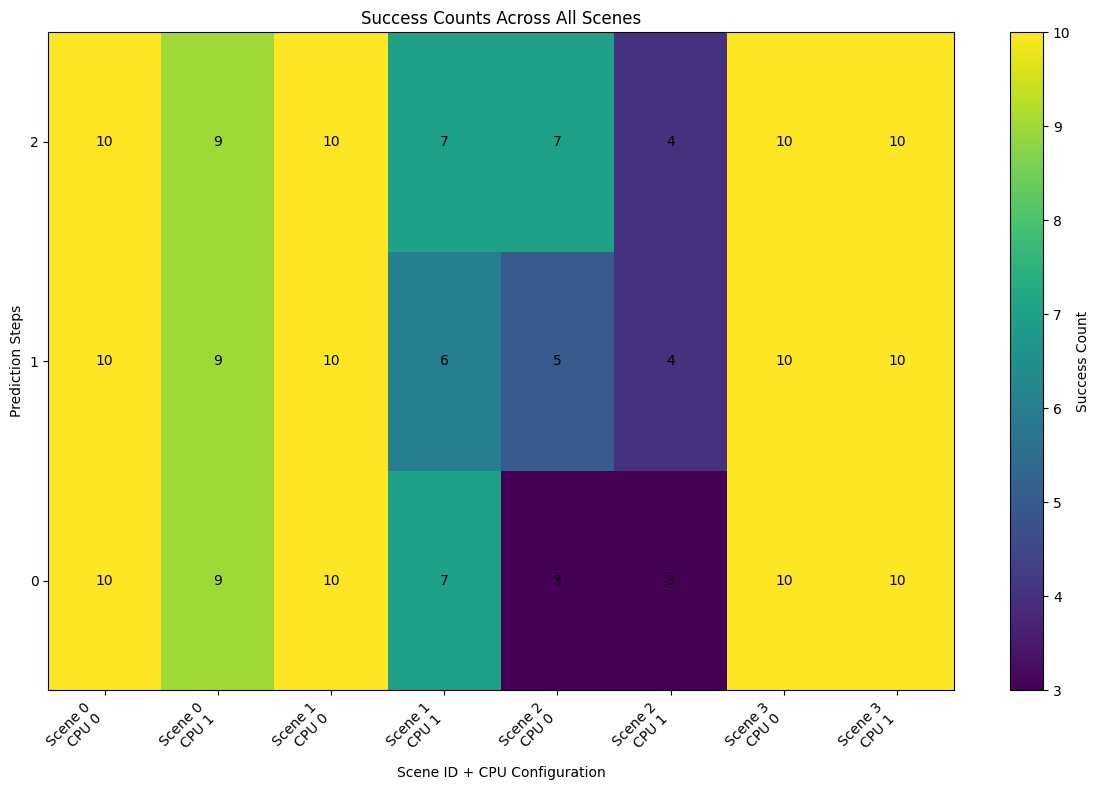

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the combined data array
# First, get the shape of the data
n_pred_steps = len(success_dfs[0].columns)  # number of prediction steps
n_scenes = len(success_dfs)  # number of scenes
n_cpu = len(success_dfs[0].index)  # number of CPU configurations

# Initialize the combined data array
combined_data = np.zeros((n_pred_steps, n_scenes * n_cpu))

# Fill the combined data array
for scene_id, df in success_dfs.items():
    for cpu_idx, cpu_val in enumerate(df.index):
        col_idx = scene_id * n_cpu + cpu_idx
        combined_data[:, col_idx] = df.loc[cpu_val].values

# Create labels for x-axis (scene_id + cpu combinations)
x_labels = [f'Scene {scene_id}\nCPU {cpu}' 
           for scene_id in success_dfs.keys() 
           for cpu in success_dfs[scene_id].index]

# Create the heatmap
im = plt.imshow(combined_data, 
                cmap='viridis',
                aspect='auto')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Success Count')

# Set ticks and labels
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45, ha='right')
plt.yticks(np.arange(n_pred_steps), success_dfs[0].columns)

# Add labels and title
plt.xlabel('Scene ID + CPU Configuration')
plt.ylabel('Prediction Steps')
plt.title('Success Counts Across All Scenes')

# Add text annotations
for i in range(n_pred_steps):
    for j in range(len(x_labels)):
        text = plt.text(j, i, f'{int(combined_data[i, j])}',
                       ha='center', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.gca().invert_yaxis()

# Show the plot
plt.show()